In [1]:
%load_ext autoreload
%autoreload 2
import sys
print('Version:', sys.version)
print('Python executable:', sys.executable)

Version: 3.8.5 (default, Sep  4 2020, 07:30:14) 
[GCC 7.3.0]
Python executable: /home/francisco/anaconda3/bin/python


In [2]:
from fastai.basics import *
from fastai.vision.all import *
import numpy as np
import glob 
import os, sys
import pandas as pd

import fastai
fastai.__version__

'2.2.5'

In [3]:
experiment_name='Exp_2_UrbanSound_MEL-Spectrogram'

In [4]:
def get_path_folder_files(path):
    fPath   = []
    fFolder = []
    fName   = []

    for root, directories, files in os.walk(path, topdown=False):
        for name in files:
            fPath.append(os.path.join(root, name))
            fFolder.append(os.path.join(root))
            fName.append(os.path.join(name))
            #for name in directories:
                #print(os.path.join(root, name))
    return fPath, fFolder, fName

In [5]:
path=r'/home/francisco/Documents/UrbanSound challenge/data/Exp_2_UrbanSound_MEL-Spectrogram/20211021-210803/'

In [6]:
fPath, fFolder, fName = get_path_folder_files(path)

In [7]:
print(len(fPath))
print(len(fFolder))
print(len(fName))

8732
8732
8732


['dog_bark' 'children_playing' 'car_horn' 'air_conditioner' 'street_music'
 'gun_shot' 'siren' 'engine_idling' 'jackhammer' 'drilling']


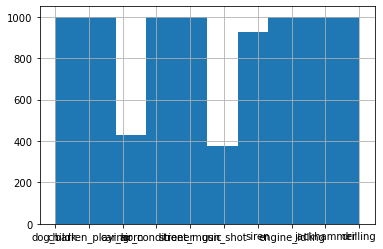

In [8]:
file_name = '/home/francisco/Documents/UrbanSound challenge/UrbanSound8K.csv'
df = pd.read_csv(file_name)
class_names=df['class'].unique()
print(class_names)

df['class'].hist();

### Move images to separate folder. One folder for each volume. This folders will be the labels.

In [9]:
destination=r'/home/francisco/Documents/UrbanSound challenge/data/Exp_2_UrbanSound_MEL-Spectrogram/train/'
for class_name in class_names:
    #print(class_name)
    fPath, fFolder, fName = get_path_folder_files(path)
    destinationFolder=destination+class_name
    print(destinationFolder)
    # Create a new folder
    if not os.path.exists(destinationFolder):
        os.makedirs(destinationFolder)
    for file in fPath:
        if (file.find(class_name) != -1): # Look for the class in file name
            shutil.move(file, destinationFolder)


/home/francisco/Documents/UrbanSound challenge/data/Exp_2_UrbanSound_MEL-Spectrogram/train/dog_bark
/home/francisco/Documents/UrbanSound challenge/data/Exp_2_UrbanSound_MEL-Spectrogram/train/children_playing
/home/francisco/Documents/UrbanSound challenge/data/Exp_2_UrbanSound_MEL-Spectrogram/train/car_horn
/home/francisco/Documents/UrbanSound challenge/data/Exp_2_UrbanSound_MEL-Spectrogram/train/air_conditioner
/home/francisco/Documents/UrbanSound challenge/data/Exp_2_UrbanSound_MEL-Spectrogram/train/street_music
/home/francisco/Documents/UrbanSound challenge/data/Exp_2_UrbanSound_MEL-Spectrogram/train/gun_shot
/home/francisco/Documents/UrbanSound challenge/data/Exp_2_UrbanSound_MEL-Spectrogram/train/siren
/home/francisco/Documents/UrbanSound challenge/data/Exp_2_UrbanSound_MEL-Spectrogram/train/engine_idling
/home/francisco/Documents/UrbanSound challenge/data/Exp_2_UrbanSound_MEL-Spectrogram/train/jackhammer
/home/francisco/Documents/UrbanSound challenge/data/Exp_2_UrbanSound_MEL-Spec

# Get Test Set

In [10]:
path=r'/home/francisco/Documents/UrbanSound challenge/data/Exp_2_UrbanSound_MEL-Spectrogram/train/'

In [11]:
fPath, fFolder, fName = get_path_folder_files(path)

In [12]:
# Set random seed
random.seed(2021)

In [13]:
class_names

array(['dog_bark', 'children_playing', 'car_horn', 'air_conditioner',
       'street_music', 'gun_shot', 'siren', 'engine_idling', 'jackhammer',
       'drilling'], dtype=object)

In [14]:
# Set random seed
np.random.seed(2021)

folder_from=r'/home/francisco/Documents/UrbanSound challenge/data/Exp_2_UrbanSound_MEL-Spectrogram/train/'
destination=r'/home/francisco/Documents/UrbanSound challenge/data/Exp_2_UrbanSound_MEL-Spectrogram/test/'

for class_name in class_names:
    folder_file_from=folder_from+class_name
    print('From:', folder_file_from)
    destinationFolder=destination+class_name
    print('Destination:', destinationFolder)
    # Create a new folder
    if not os.path.exists(destinationFolder):
        os.makedirs(destinationFolder)
    fPath, fFolder, fName = get_path_folder_files(folder_file_from)
    files_to_move=np.random.choice(fPath,size=int(len(fName)*0.1), replace=False)
    print(files_to_move)
    for file in files_to_move:
        shutil.move(file, destinationFolder)

From: /home/francisco/Documents/UrbanSound challenge/data/Exp_2_UrbanSound_MEL-Spectrogram/train/dog_bark
Destination: /home/francisco/Documents/UrbanSound challenge/data/Exp_2_UrbanSound_MEL-Spectrogram/test/dog_bark
['/home/francisco/Documents/UrbanSound challenge/data/Exp_2_UrbanSound_MEL-Spectrogram/train/dog_bark/189846-3-1-0_dog_bark.png'
 '/home/francisco/Documents/UrbanSound challenge/data/Exp_2_UrbanSound_MEL-Spectrogram/train/dog_bark/176258-3-1-13_dog_bark.png'
 '/home/francisco/Documents/UrbanSound challenge/data/Exp_2_UrbanSound_MEL-Spectrogram/train/dog_bark/65381-3-0-6_dog_bark.png'
 '/home/francisco/Documents/UrbanSound challenge/data/Exp_2_UrbanSound_MEL-Spectrogram/train/dog_bark/165567-3-3-0_dog_bark.png'
 '/home/francisco/Documents/UrbanSound challenge/data/Exp_2_UrbanSound_MEL-Spectrogram/train/dog_bark/27349-3-1-2_dog_bark.png'
 '/home/francisco/Documents/UrbanSound challenge/data/Exp_2_UrbanSound_MEL-Spectrogram/train/dog_bark/97392-3-0-0_dog_bark.png'
 '/home/fr

In [15]:
from fastai.vision.all import *
from fastai.vision.core import *
from fastai.vision.data import *

import fastai
fastai.__version__

print(torch.cuda.is_available())

True


In [16]:
path = Path('/home/francisco/Documents/UrbanSound challenge/data/Exp_2_UrbanSound_MEL-Spectrogram/train/')

In [17]:
path.ls()

(#10) [Path('/home/francisco/Documents/UrbanSound challenge/data/Exp_2_UrbanSound_MEL-Spectrogram/train/siren'),Path('/home/francisco/Documents/UrbanSound challenge/data/Exp_2_UrbanSound_MEL-Spectrogram/train/drilling'),Path('/home/francisco/Documents/UrbanSound challenge/data/Exp_2_UrbanSound_MEL-Spectrogram/train/children_playing'),Path('/home/francisco/Documents/UrbanSound challenge/data/Exp_2_UrbanSound_MEL-Spectrogram/train/street_music'),Path('/home/francisco/Documents/UrbanSound challenge/data/Exp_2_UrbanSound_MEL-Spectrogram/train/car_horn'),Path('/home/francisco/Documents/UrbanSound challenge/data/Exp_2_UrbanSound_MEL-Spectrogram/train/air_conditioner'),Path('/home/francisco/Documents/UrbanSound challenge/data/Exp_2_UrbanSound_MEL-Spectrogram/train/gun_shot'),Path('/home/francisco/Documents/UrbanSound challenge/data/Exp_2_UrbanSound_MEL-Spectrogram/train/jackhammer'),Path('/home/francisco/Documents/UrbanSound challenge/data/Exp_2_UrbanSound_MEL-Spectrogram/train/engine_idling'

In [18]:
vi_datablock = DataBlock(
    blocks = (ImageBlock, CategoryBlock),
    get_items = get_image_files,
    get_y = parent_label,
    splitter = GrandparentSplitter(),
    item_tfms=Resize(460, ResizeMethod.Squish),
    batch_tfms=aug_transforms(mult=2)
    )

In [19]:
fnames = get_image_files(path)

In [20]:
len(fnames)

7861

### Function to get load images from the path and get labels from the subdirectory file names

In [21]:
def label_func(x): return x.parent.name

In [22]:
dls = ImageDataLoaders.from_path_func(path, 
                                      fnames,
                                      label_func,
                                      valid_pct=0.2, seed=10,
                                      item_tfms=Resize(224, ResizeMethod.Squish))

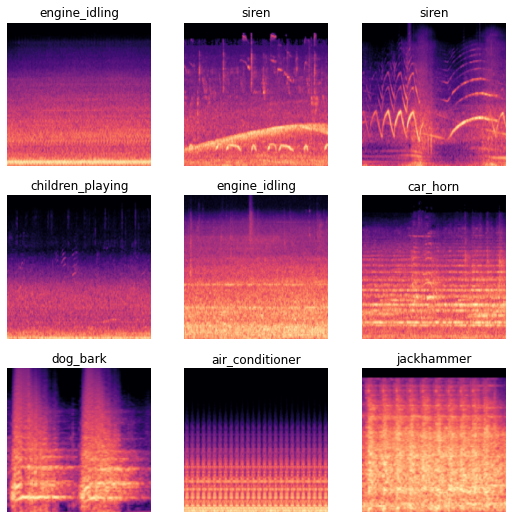

In [23]:
dls.valid.show_batch()

### Build a CNN model with pretrained networks

In [25]:
# Build a CNN model with the pretrained resnet18
# Error rate = 1 - accuracy
learn = cnn_learner(dls, resnet18, metrics= [accuracy])
learn.fine_tune(1)

epoch,train_loss,valid_loss,accuracy,time
0,1.544525,0.725516,0.770356,00:15


epoch,train_loss,valid_loss,accuracy,time
0,0.564189,0.374928,0.884224,00:18


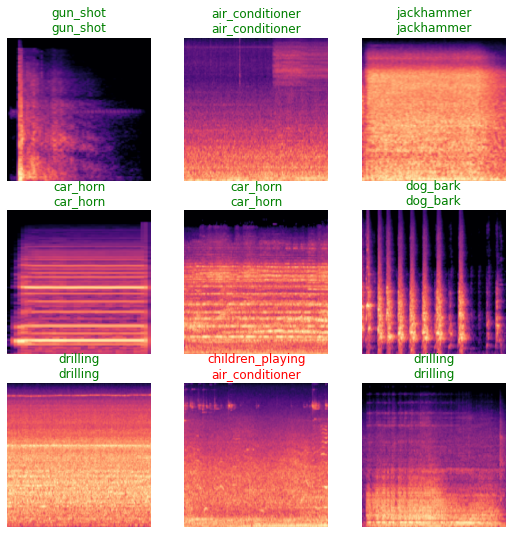

In [26]:
learn.show_results()

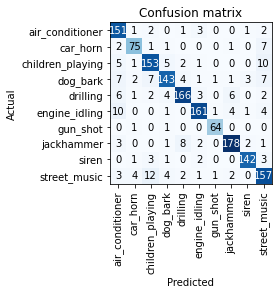

In [27]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

Minimum/10: 6.31e-08, steepest point: 1.58e-06


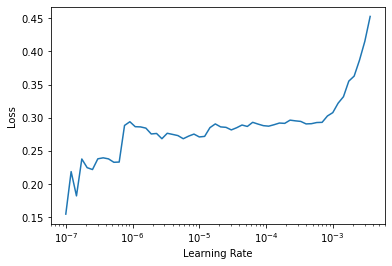

In [28]:
# Find the optimal learning rate and plot a visual
lr_min,lr_steep=learn.lr_find()
print(f"Minimum/10: {lr_min:.2e}, steepest point: {lr_steep:.2e}")

In [29]:
learn.fit_one_cycle(50,lr_min)#3.98e-05)

epoch,train_loss,valid_loss,accuracy,time
0,0.301988,0.380821,0.880407,00:18
1,0.304068,0.376923,0.877863,00:19
2,0.306375,0.376265,0.881043,00:19
3,0.295619,0.375753,0.881679,00:19
4,0.307385,0.374396,0.884860,00:19
5,0.307230,0.370781,0.884224,00:19
6,0.294905,0.372107,0.885496,00:19
7,0.314915,0.376403,0.877863,00:19
8,0.287632,0.376581,0.882952,00:19
9,0.292324,0.376316,0.884224,00:19


Minimum/10: 1.58e-05, steepest point: 3.98e-06


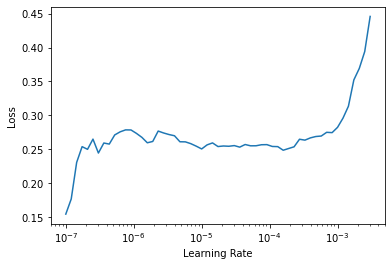

In [30]:
# Find the optimal learning rate and plot a visual
lr_min,lr_steep=learn.lr_find()
print(f"Minimum/10: {lr_min:.2e}, steepest point: {lr_steep:.2e}")

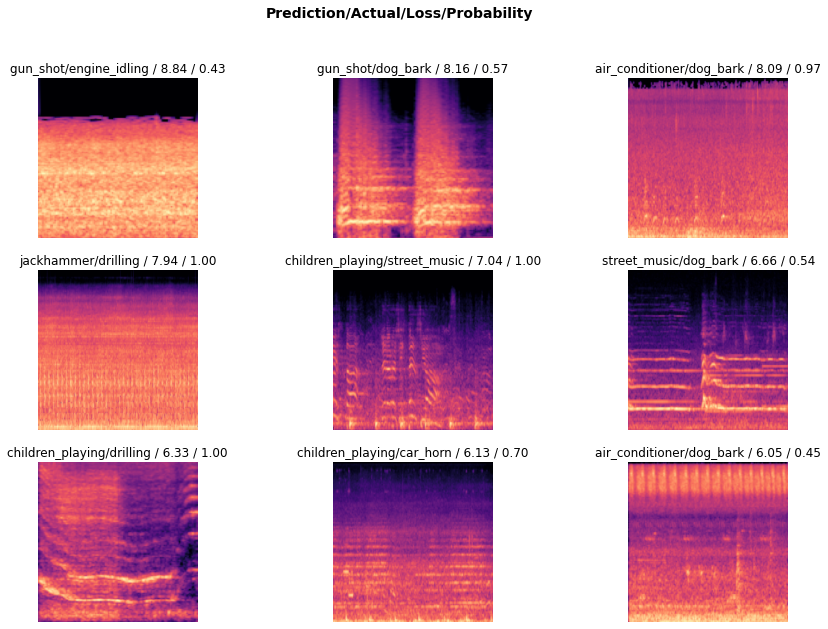

In [31]:
interp.plot_top_losses(9, figsize=(15,10))

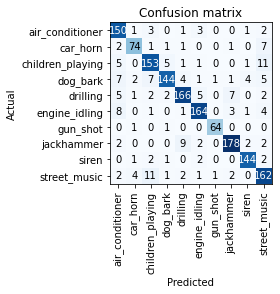

In [32]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [33]:
timestr = time.strftime("%Y%m%d-%H%M%S") 
learn.save(experiment_name+timestr)

Path('/home/francisco/Documents/UrbanSound challenge/data/Exp_2_UrbanSound_MEL-Spectrogram/train/models/Exp_2_UrbanSound_MEL-Spectrogram20211021-215144.pth')

### Test 

In [34]:
path_test=Path('/home/francisco/Documents/UrbanSound challenge/data/Exp_2_UrbanSound_MEL-Spectrogram/test/')

In [35]:
fnames_test = get_image_files(path_test)

In [36]:
len(fnames_test)

871

In [37]:
dls_test = ImageDataLoaders.from_path_func(path, 
                                          fnames,
                                          label_func,
                                          valid_pct=0.2, seed=10,
                                          item_tfms=Resize(224, ResizeMethod.Squish))

In [38]:
gt_test = []
for testFile in fnames_test:
    gt_test.append(testFile.parent.name)

In [39]:
test_preds = []
for testFile in fnames_test:
    pred_class, pred_idx, outputs = learn.predict(testFile)
    test_preds.append(pred_class)

In [40]:
correctPreds =[x==y for x, y in zip(gt_test, test_preds)]
testAccuracy = np.sum(correctPreds)/len(fnames_test)
print('Test set accuracy: ', testAccuracy*100, '%')

Test set accuracy:  90.35591274397244 %


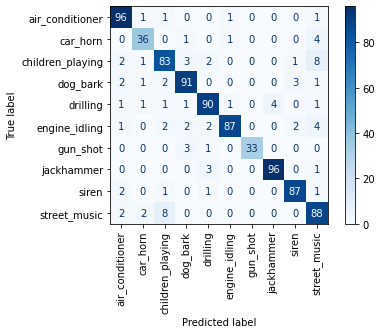

In [41]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(gt_test, test_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=learn.dls.vocab)
disp.plot(cmap='Blues',xticks_rotation='vertical')

### Adjust tbe learning rate and train for more cycles

In [42]:
learn.fit_one_cycle(20,lr_min)#3.98e-05)

epoch,train_loss,valid_loss,accuracy,time
0,0.255157,0.354576,0.893766,00:18
1,0.257523,0.342621,0.893130,00:19
2,0.212395,0.310343,0.898219,00:19
3,0.170437,0.297801,0.902036,00:19
4,0.121075,0.267917,0.917939,00:19
5,0.094279,0.252362,0.919847,00:19
6,0.067823,0.244922,0.923664,00:19
7,0.049146,0.245695,0.927481,00:19
8,0.037120,0.228897,0.928753,00:19
9,0.032781,0.230665,0.931934,00:19


Minimum/10: 9.12e-06, steepest point: 1.32e-06


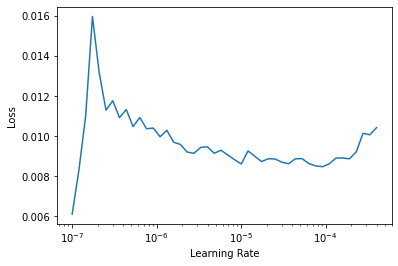

In [43]:
# Find the optimal learning rate and plot a visual
lr_min,lr_steep=learn.lr_find()
print(f"Minimum/10: {lr_min:.2e}, steepest point: {lr_steep:.2e}")

In [44]:
learn.fit_one_cycle(20,lr_min)#3.98e-05)

epoch,train_loss,valid_loss,accuracy,time
0,0.008594,0.212000,0.936387,00:19
1,0.009583,0.213256,0.937659,00:19
2,0.011110,0.210787,0.935115,00:19
3,0.010600,0.214300,0.938295,00:19
4,0.009076,0.214686,0.938931,00:19
5,0.009808,0.213785,0.940840,00:19
6,0.008112,0.218543,0.939567,00:19
7,0.006589,0.223065,0.935751,00:19
8,0.004833,0.218508,0.940840,00:19
9,0.004315,0.204773,0.939567,00:19


Minimum/10: 1.58e-07, steepest point: 7.59e-07


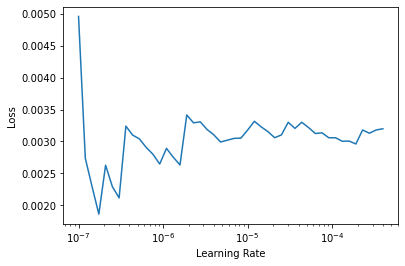

In [45]:
# Find the optimal learning rate and plot a visual
lr_min,lr_steep=learn.lr_find()
print(f"Minimum/10: {lr_min:.2e}, steepest point: {lr_steep:.2e}")

In [46]:
learn.fit_one_cycle(20,lr_min)#3.98e-05)

epoch,train_loss,valid_loss,accuracy,time
0,0.002876,0.206455,0.940840,00:19
1,0.002734,0.208298,0.939567,00:19
2,0.003209,0.205783,0.940204,00:19
3,0.003025,0.208180,0.940204,00:19
4,0.002473,0.210576,0.938295,00:19
5,0.002915,0.208733,0.941476,00:19
6,0.002542,0.211245,0.938295,00:19
7,0.003093,0.203513,0.940840,00:19
8,0.002716,0.206140,0.939567,00:19
9,0.002592,0.208261,0.939567,00:20


Minimum/10: 8.32e-07, steepest point: 1.10e-06


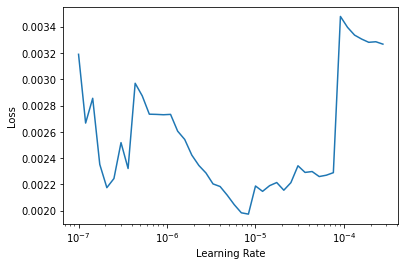

In [47]:
# Find the optimal learning rate and plot a visual
lr_min,lr_steep=learn.lr_find()
print(f"Minimum/10: {lr_min:.2e}, steepest point: {lr_steep:.2e}")

In [48]:
learn.fit_one_cycle(20,lr_min)#3.98e-05)

epoch,train_loss,valid_loss,accuracy,time
0,0.002774,0.208724,0.937659,00:19
1,0.003268,0.204380,0.940840,00:19
2,0.003100,0.207040,0.937659,00:19
3,0.003538,0.206360,0.941476,00:19
4,0.002653,0.207406,0.940840,00:19
5,0.003398,0.206958,0.940204,00:19
6,0.002642,0.210009,0.940204,00:19
7,0.002453,0.205973,0.938931,00:19
8,0.002413,0.208594,0.940204,00:19
9,0.002246,0.209407,0.937659,00:19


Minimum/10: 4.79e-07, steepest point: 9.12e-07


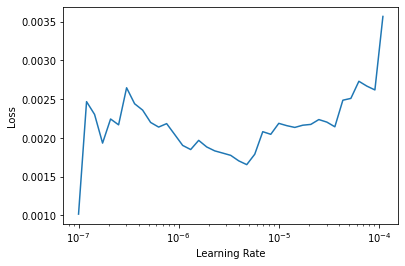

In [49]:
# Find the optimal learning rate and plot a visual
lr_min,lr_steep=learn.lr_find()
print(f"Minimum/10: {lr_min:.2e}, steepest point: {lr_steep:.2e}")

In [50]:
learn.fit_one_cycle(20,lr_min)#3.98e-05)

epoch,train_loss,valid_loss,accuracy,time
0,0.002284,0.210001,0.940204,00:19
1,0.002292,0.202285,0.942112,00:19
2,0.002153,0.209889,0.939567,00:19
3,0.002753,0.205568,0.941476,00:19
4,0.002359,0.208296,0.937023,00:19
5,0.002670,0.208025,0.940840,00:19
6,0.002262,0.212980,0.939567,00:19
7,0.002710,0.205172,0.938295,00:19
8,0.002644,0.211378,0.940204,00:19
9,0.002111,0.204861,0.936387,00:19


### Test

In [51]:
path_test=Path('/home/francisco/Documents/UrbanSound challenge/data/Exp_2_UrbanSound_MEL-Spectrogram/test/')

In [52]:
fnames_test = get_image_files(path_test)

In [53]:
dls_test = ImageDataLoaders.from_path_func(path, 
                                          fnames,
                                          label_func,
                                          valid_pct=0.2, seed=10,
                                          item_tfms=Resize(224, ResizeMethod.Squish))

In [54]:
gt_test = []
for testFile in fnames_test:
    gt_test.append(testFile.parent.name)

In [55]:
test_preds = []
for testFile in fnames_test:
    pred_class, pred_idx, outputs = learn.predict(testFile)
    test_preds.append(pred_class)

In [56]:
correctPreds =[x==y for x, y in zip(gt_test, test_preds)]
testAccuracy = np.sum(correctPreds)/len(fnames_test)
print('Test set accuracy: ', testAccuracy*100, '%')

Test set accuracy:  95.52238805970148 %


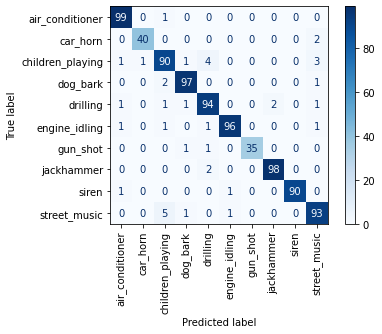

In [57]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(gt_test, test_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=learn.dls.vocab)
disp.plot(cmap='Blues',xticks_rotation='vertical')

In [58]:
timestr = time.strftime("%Y%m%d-%H%M%S") 
learn.save(experiment_name+timestr)

Path('/home/francisco/Documents/UrbanSound challenge/data/Exp_2_UrbanSound_MEL-Spectrogram/train/models/Exp_2_UrbanSound_MEL-Spectrogram20211021-223910.pth')